In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand
import cerberus

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.mane_utils import *
from scripts.plotting import *

In [2]:
config_file = '../snakemake/config.yml'
with open(config_file) as f:
    config = yaml.safe_load(f)

In [3]:
ab = '../'+expand(config['data']['ab'], species='human')[0]
filt_ab = '../'+expand(config['data']['filt_ab'], species='human')[0]
read_annot = '../'+expand(config['data']['read_annot'], species='human')[0]
t_metadata = '../'+expand(config['ref']['cerberus']['t_info'], species='human')[0]
lib_meta = '../'+expand(config['data']['meta'], species='human')[0]
swan_file = '../'+expand(config['data']['sg'], species='human')[0]
cerberus_h5 = '../'+expand(config['data']['cerb_annot'], species='human')[0]
major_isos = '../'+expand(config['data']['major_isos'], species='human', obs_col='sample')[0]
pp_summary = '../'+expand(config['data']['p_pred']['summary'], species='human')[0]
ref_t_metadata = '../'+expand(config['ref']['t_info'], species='human')[0]
ref_g_metadata = '../'+expand(config['ref']['g_info'], species='human')[0]


sr_ab = '../'+config['sr']['ab']


ver = 'v40_cerberus'
min_tpm = 1
gene_subset = 'protein_coding'
obs_col = 'sample'
go_gene_subset = 'protein_coding'

m_lib_meta = '../'+expand(config['data']['meta'], species='mouse')[0]
m_ab = '../'+expand(config['data']['ab'], species='mouse')[0]
m_filt_ab = '../'+expand(config['data']['filt_ab'], species='mouse')[0]
m_read_annot = '../'+expand(config['data']['read_annot'], species='mouse')[0]
m_t_metadata = '../'+expand(config['ref']['cerberus']['t_info'], species='mouse')[0]
m_swan_file = '../'+expand(config['data']['sg'], species='mouse')[0]
m_cerberus_h5 = '../'+expand(config['data']['cerb_annot'], species='mouse')[0]
m_pi_tpm_table = '../'+expand(config['data']['pi_tpm']['triplet'], species='mouse', obs_col='sample')[0]
m_major_isos = '../'+expand(config['data']['major_isos'], species='mouse', obs_col='sample')[0]
m_pp_summary = '../'+expand(config['data']['p_pred']['summary'], species='mouse')[0]
m_ref_t_metadata = '../'+expand(config['ref']['t_info'], species='mouse')[0]
m_ref_g_metadata = '../'+expand(config['ref']['g_info'], species='mouse')[0]


mouse_ver = 'vM25_cerberus'

In [4]:
# human data
ca = cerberus.read(cerberus_h5)
ca = get_centroids(ca, source='sample_det')
ca = get_centroids(ca, source='sample_major')
sg = swan.read(swan_file)

Read in graph from ../data/human/swan_graph.p


In [5]:
# mouse data
m_ca = cerberus.read(m_cerberus_h5)
m_ca = get_centroids(m_ca, source='sample_det')
m_ca = get_centroids(m_ca, source='sample_major')
m_sg = swan.read(m_swan_file)

Read in graph from ../data/mouse/swan_graph.p


## Human

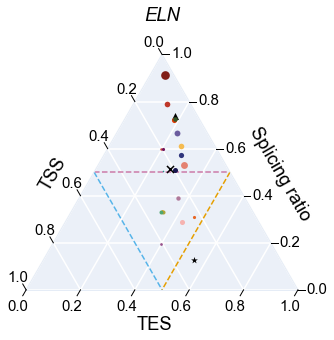

In [6]:
# human simplex

# change me
gene = 'ELN'

c_dict, order = get_biosample_colors()
c_dict[np.nan] = 'k'
mmap = {'v40': '*',
        'obs_det': '^',
        'sample_det_centroid': 'x'}
subset = {'source': ['v40',
                     'obs_det',
                     'sample_det',
                     'sample_det_centroid']}
df = ca.plot_simplex(top='splicing_ratio',
            gene=gene,
            hue='sample',
            cmap=c_dict,
            size='gene_tpm',
            log_size=True,
            sectors=True,
            marker_style='source',
            mmap=mmap,
            legend=False,
            jitter=True,
            subset=subset,
            size_scale=0.5)

Calculating iso TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2096: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/utils.py:2095: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # isos detected: 231136
# isos >= 1 tpm: 210239
Applying gene type and novelty subset
Number of isos reported: 206806
Found 50 total samples


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/plotting.py:6094: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


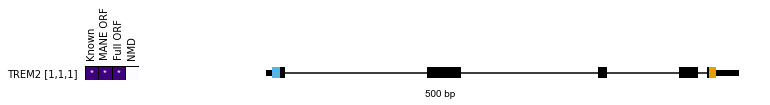

In [5]:
# human browser

# change me
gene = 'TREM2'
obs_condition = 'brain'

obs_col = 'sample'
_ = plot_browser_isos(ca, sg,
                  gene,
                  obs_col, 
                  obs_condition, 
                  filt_ab,
                  pp_summary,
                  major_isos,
                  h=0.4,
                  w=10,
                  fig_w=14,
                  species='human',
                  major=False)

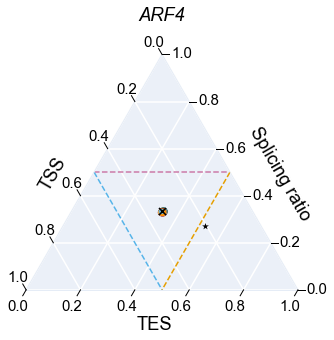

In [31]:
# human major simplex

# change me
gene = 'ARF4'

c_dict, order = get_biosample_colors()
c_dict[np.nan] = 'k'
mmap = {'v40': '*',
        'obs_major': '^',
        'sample_major_centroid': 'x'}
subset = {'source': ['v40',
                     'obs_major',
                     'sample_major',
                     'sample_major_centroid']}
df = ca.plot_simplex(top='splicing_ratio',
            gene=gene,
            hue='sample',
            cmap=c_dict,
            size='gene_tpm',
            log_size=True,
            sectors=True,
            marker_style='source',
            mmap=mmap,
            legend=False,
            jitter=True,
            subset=subset,
            size_scale=0.5)

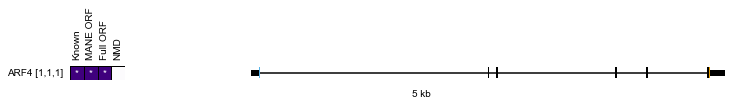

In [30]:
# human major browser

# change me
gene = 'ARF4'
obs_condition = 'h1'

obs_col = 'sample'
_ = plot_browser_isos(ca, sg,
                  gene,
                  obs_col, 
                  obs_condition, 
                  filt_ab,
                  pp_summary,
                  major_isos,
                  h=0.4,
                  w=10,
                  fig_w=14,
                  species='human',
                  major=True)

## Mouse

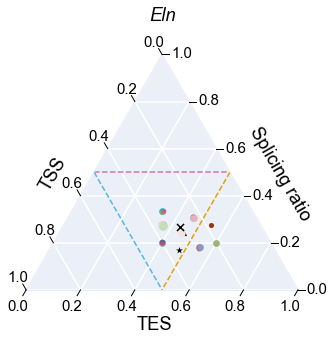

In [7]:
# mouse simplex

# change me
gene = 'Eln'

c_dict, order = get_biosample_colors(species='mouse')
c_dict[np.nan] = 'k'
mmap = {'vM25': '*',
        'obs_det': '^',
        'sample_det_centroid': 'x'}
subset = {'source': ['vM25',
                     'obs_det',
                     'sample_det',
                     'sample_det_centroid']}
df = m_ca.plot_simplex(top='splicing_ratio',
            gene=gene,
            hue='sample',
            cmap=c_dict,
            size='gene_tpm',
            log_size=True,
            sectors=True,
            marker_style='source',
            mmap=mmap,
            legend=False,
            jitter=True,
            subset=subset,
            size_scale=0.5)

Calculating iso TPM values
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 149463
# isos >= 1 tpm: 138642
Applying gene type and novelty subset
Number of isos reported: 135450
Found 37 total samples


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/scripts/plotting.py:6094: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


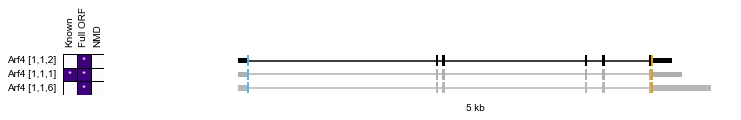

In [25]:
# human browser

# change me
gene = 'Arf4'
obs_condition = 'f1219'

obs_col = 'sample'
_ = plot_browser_isos(m_ca, m_sg,
                  gene,
                  obs_col, 
                  obs_condition, 
                  m_filt_ab,
                  m_pp_summary,
                  m_major_isos,
                  h=0.4,
                  w=10,
                  fig_w=14,
                  species='mouse',
                  major=False)

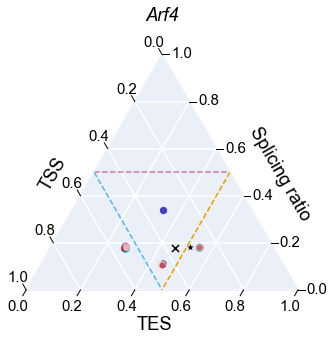

In [18]:
# mouse major simplex

# change me
gene = 'Arf4'

c_dict, order = get_biosample_colors(species='mouse')
c_dict[np.nan] = 'k'
mmap = {'vM25': '*',
        'obs_major': '^',
        'sample_major_centroid': 'x'}
subset = {'source': ['vM25',
                     'obs_major',
                     'sample_major',
                     'sample_major_centroid']}
df = m_ca.plot_simplex(top='splicing_ratio',
            gene=gene,
            hue='sample',
            cmap=c_dict,
            size='gene_tpm',
            log_size=True,
            sectors=True,
            marker_style='source',
            mmap=mmap,
            legend=False,
            jitter=True,
            subset=subset,
            size_scale=0.5)